<a href="https://colab.research.google.com/github/AtharvaAnupWasnik3021/ML_LAb/blob/main/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
from numpy.linalg import norm

# === Step 1: Load Dataset ===
df = pd.read_csv("Wmunu.csv")
# === Step 2: Define Classes ===
# Let's assume Q (+1) = matter, Q (–1) = antimatter
class1_df = df[df['Q'] == 1]
class2_df = df[df['Q'] == -1]

# === Step 3: Choose only feature columns (excluding Run, Event, Q) ===
feature_cols = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']

# Get feature vectors for both classes
features_class1 = class1_df[feature_cols].values
features_class2 = class2_df[feature_cols].values

# === Step 4
centroid1 = np.mean(features_class1, axis=0)
centroid2 = np.mean(features_class2, axis=0)

# === Step 5
spread1 = np.std(features_class1, axis=0)
spread2 = np.std(features_class2, axis=0)

# === Step 6
interclass_distance = norm(centroid1 - centroid2)

# Results
print("Centroid (mean vector) of Class 1 (Q=+1):\n", centroid1)
print("\nCentroid (mean vector) of Class 2 (Q=-1):\n", centroid2)

print("\nSpread (std deviation) of Class 1:\n", spread1)
print("\nSpread (std deviation) of Class 2:\n", spread2)

print("\nEuclidean distance between centroids:", interclass_distance)

Centroid (mean vector) of Class 1 (Q=+1):
 [ 3.81592275e+01  3.57069586e-03  5.15753099e-03  6.78782000e+00
 -1.70795497e-02  1.58349997e+01  2.74578545e+01 -1.19904048e-01]

Centroid (mean vector) of Class 2 (Q=-1):
 [ 3.96628072e+01 -4.05872704e-03  3.55083899e-03  7.67050213e+00
 -1.97290275e-02  1.79303510e+01  2.61287074e+01 -1.15775142e-01]

Spread (std deviation) of Class 1:
 [172.32617484   1.09463367   1.8181194   64.85388776   2.07431623
 109.78485387  16.74170791   1.76387559]

Spread (std deviation) of Class 2:
 [248.96676806   1.06041033   1.82277548  76.18534639   3.21473995
  34.03708575  16.26599687   1.7586272 ]

Euclidean distance between centroids: 3.032671038012761


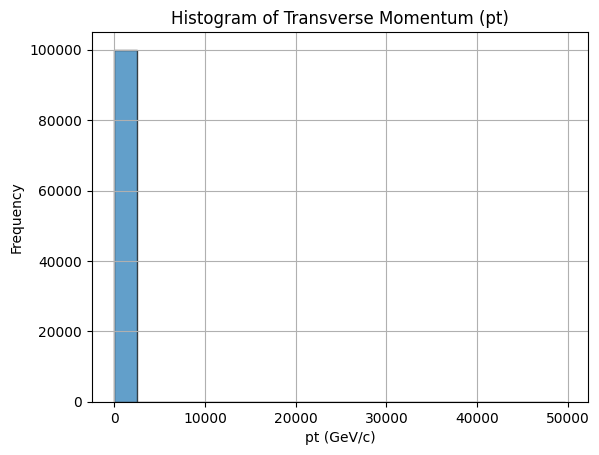

Mean of pt: 38.839341684000004
Variance of pt: 44301.765432812186


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Wmunu.csv")
pt_data = df['pt'].dropna().values
plt.hist(pt_data, bins=20, edgecolor='black', alpha=0.7)
plt.title("Histogram of Transverse Momentum (pt)")
plt.xlabel("pt (GeV/c)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()
pt_mean = np.mean(pt_data)
pt_variance = np.var(pt_data)
print("Mean of pt:", pt_mean)
print("Variance of pt:", pt_variance)

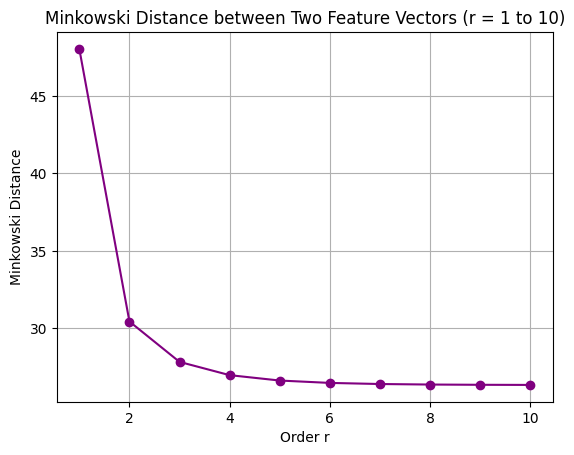

r = 1, distance = 48.0367
r = 2, distance = 30.4436
r = 3, distance = 27.8368
r = 4, distance = 26.9813
r = 5, distance = 26.6339
r = 6, distance = 26.4803
r = 7, distance = 26.4093
r = 8, distance = 26.3754
r = 9, distance = 26.3589
r = 10, distance = 26.3507


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("Wmunu.csv")
feature_cols = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
vec1 = df.iloc[0][feature_cols].values.astype(float)
vec2 = df.iloc[1][feature_cols].values.astype(float)
r_values = list(range(1, 11))
distances = []
for r in r_values:
    dist = np.sum(np.abs(vec1 - vec2)**r)**(1/r)
    distances.append(dist)
plt.plot(r_values, distances, marker='o', linestyle='-', color='purple')
plt.title("Minkowski Distance between Two Feature Vectors (r = 1 to 10)")
plt.xlabel("Order r")
plt.ylabel("Minkowski Distance")
plt.grid(True)
plt.show()
for r, d in zip(r_values, distances):
    print(f"r = {r}, distance = {d:.4f}")

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv("Wmunu.csv")
df = df[(df['Q'] == 1) | (df['Q'] == -1)]
feature_columns = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
X = df[feature_columns].values
y = df['Q'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 70000
Testing set size: 30000


Accuracy: 0.5096333333333334

Classification Report:
               precision    recall  f1-score   support

          -1       0.45      0.43      0.44     13483
           1       0.55      0.57      0.56     16517

    accuracy                           0.51     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.51      0.51      0.51     30000

Confusion Matrix:
 [[5862 7621]
 [7090 9427]]
k = 1, Accuracy = 0.5084
k = 2, Accuracy = 0.4827
k = 3, Accuracy = 0.5096
k = 4, Accuracy = 0.4931
k = 5, Accuracy = 0.5164
k = 6, Accuracy = 0.4991
k = 7, Accuracy = 0.5192
k = 8, Accuracy = 0.5062
k = 9, Accuracy = 0.5214
k = 10, Accuracy = 0.5133
k = 11, Accuracy = 0.5223


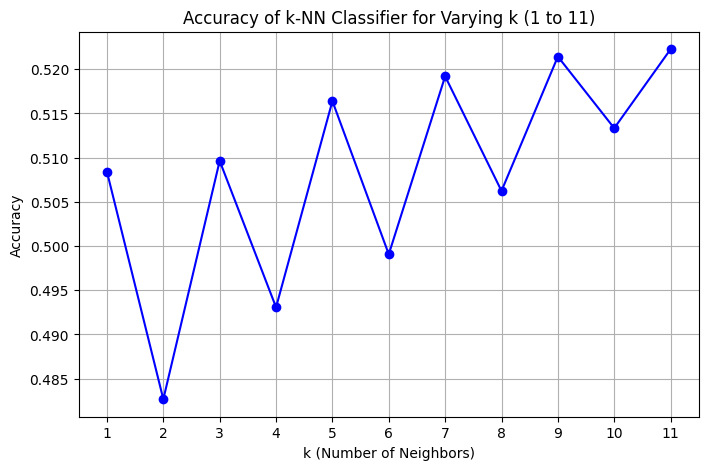

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv("Wmunu.csv")
df = df[(df['Q'] == 1) | (df['Q'] == -1)]
feature_columns = ['pt', 'eta', 'phi', 'chiSq', 'dxy', 'iso', 'MET', 'phiMET']
X = df[feature_columns].values
y = df['Q'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = list(range(1, 12))
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    print(f"k = {k}, Accuracy = {acc:.4f}")
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='blue')
plt.title('Accuracy of k-NN Classifier for Varying k (1 to 11)')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_train_pred = knn.predict(X_train)
cm_train = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix (Train):\n", cm_train)
print("\nClassification Report (Train):\n", classification_report(y_train, y_train_pred))
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)

# --- XGBoost ---

le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

xgb = XGBClassifier(n_estimators=300)
xgb.fit(X_train, y_train_encoded)
print("XGB Accuracy:", xgb.score(X_test, y_test_encoded))

Confusion Matrix (Train):
 [[22401  9349]
 [ 7833 30417]]

Classification Report (Train):
               precision    recall  f1-score   support

          -1       0.74      0.71      0.72     31750
           1       0.76      0.80      0.78     38250

    accuracy                           0.75     70000
   macro avg       0.75      0.75      0.75     70000
weighted avg       0.75      0.75      0.75     70000

Training Accuracy: 0.7545428571428572
XGB Accuracy: 0.5279666666666667
